In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

In [2]:
params = {}

In [3]:
train_X = pd.read_csv("./data/train/train_x.csv")
train_y = pd.read_csv("./data/train/train_y.csv")

test_x = pd.read_csv("./data/test/test_x.csv")
test_y = pd.read_csv("./data/test/test_y.csv")

In [4]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(train_X)
X_test = sc_x.transform(test_x)

y_train = sc_y.fit_transform(train_y)
y_test = sc_y.transform(test_y)

C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [5]:
input_neuron = len(test_x.columns)

In [6]:
classifier = Sequential()
classifier.add(Dense(output_dim = 18, init = 'uniform', activation = 'relu', input_dim = input_neuron))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

classifier.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics = ["mae"])

classifier.fit(X_train, y_train, batch_size = 30, nb_epoch = 1000, validation_split= 0.2)


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=34, units=18, kernel_initializer="uniform")`
  
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initialize

Instructions for updating:
Use tf.cast instead.
Train on 256 samples, validate on 64 samples
Epoch 1/1000
256/256 [==============================] - 0s 1ms/step - loss: 1.0060 - mean_absolute_error: 0.6827 - val_loss: 0.9911 - val_mean_absolute_error: 0.7560
Epoch 2/1000
256/256 [==============================] - 0s 50us/step - loss: 1.0018 - mean_absolute_error: 0.6789 - val_loss: 1.0166 - val_mean_absolute_error: 0.7716
Epoch 3/1000
256/256 [==============================] - 0s 51us/step - loss: 0.9976 - mean_absolute_error: 0.6722 - val_loss: 1.0320 - val_mean_absolute_error: 0.7812
Epoch 4/1000
256/256 [==============================] - 0s 66us/step - loss: 0.9957 - mean_absolute_error: 0.6705 - val_loss: 1.0519 - val_mean_absolute_error: 0.7934
Epoch 5/1000
256/256 [==============================] - 0s 94us/step - loss: 0.9945 - mean_absolute_error: 0.6673 - val_loss: 1.0693 - val_mean_absolute_error: 0.8042
Epoch 6/1000
256/256 [==============================] - 0s 70us/step - lo

In [7]:
if os.path.exists("./model") is False:
    os.mkdir("./model")
pickle.dump(classifier, open("./model/ReinNN.pkl", "wb"))

In [8]:
test_x["TVD_pred"] = sc_y.inverse_transform(classifier.predict(X_test))

In [9]:
df = pd.concat([test_x, test_y], axis=1)
df.rename(columns={"Z": "TVD"}, inplace=True)
df["model_error"] = df.TVD -  df.TVD_pred

In [10]:
print(f"XGBoost MAE score: {np.round(mean_absolute_error(df.TVD, df.TVD_pred))}m")
print(f"XGBoost R2 socre: {np.round(r2_score(df.TVD, df.TVD_pred), 4)}")

XGBoost MAE score: 144.0m
XGBoost R2 socre: 0.9914


In [11]:
plt.style.use("ggplot")

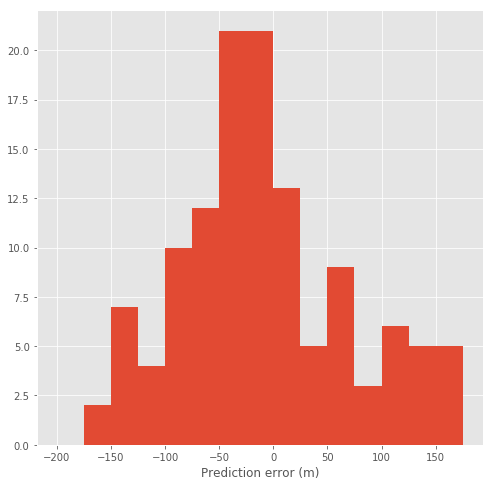

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.hist(df["model_error"], bins=np.arange(-200, 200,25))
plt.xlabel("Prediction error (m)")
plt.show()

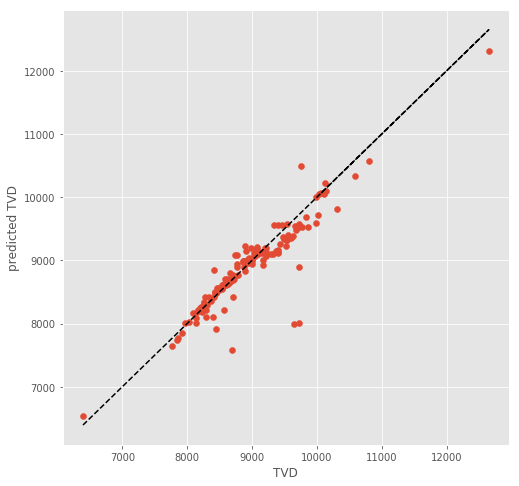

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(df.loc[df.TVD >1000].TVD, df.loc[df.TVD >1000].TVD_pred)
plt.plot(df.loc[df.TVD >1000].TVD, df.loc[df.TVD >1000].TVD, color="black", linestyle="--")
plt.xlabel("TVD")
plt.ylabel("predicted TVD")
plt.show()

In [14]:
df_global = pd.read_csv("global_test_df.csv")

In [15]:
df_global.rename(columns={"Z":"TVD"}, inplace=True)
df_global["TVD_pred"] = df["TVD_pred"]

In [16]:
if os.path.exists("model_predictions") is False:
    os.mkdir("./model_predictions")
df_global.to_csv("./model_predictions/Rein_nn_predictions.csv")